In [1]:
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss
import plotly.express as px
plt.rcParams['figure.figsize'] = [16, 9]

In [3]:
path = '/Users/ncr5341/Documents/Coursework/DataPipeline/yelp_dataset/'
business_df = pd.read_json(path+'yelp_academic_dataset_business.json', lines=True)

In [95]:
business_df[business_df['business_id'] == '--164t1nclzzmca7eDiJMw'].categories.values[0]

'Food, Ethnic Food, Nightlife, Restaurants, Dive Bars, Bars, Vietnamese, Specialty Food, Street Vendors, Event Planning & Services, Asian Fusion, Caterers, Food Stands'

In [2]:
preprocessed_review = pd.read_pickle('preprocessed_review.pkl')

In [5]:
preprocessed_review.shape

(4438241, 9)

In [3]:
preprocessed_review = preprocessed_review.sort_values(by=['business_id','date']).set_index('business_id')

In [4]:
preprocessed_review['date'] = pd.to_datetime(preprocessed_review['date'])

In [5]:
preprocessed_review_clean = preprocessed_review[preprocessed_review['text'].map(lambda x: x.isascii())]
preprocessed_review_clean.head()

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
--164t1nclzzmca7eDiJMw,HcZ2W-oRHgnP6Zs0xYfoUw,InDrrRvQ9f732YGPX4Ixmg,4.0,9,11,10,I don't want to give away too much since it wa...,2009-03-17 01:53:31
--164t1nclzzmca7eDiJMw,6kurfVrLY9LuZnH-5GGCgQ,iktHs9VX9xK4dJW9szxRBA,4.0,1,0,1,"Yum, yum. Good food, big portions and nice pri...",2009-03-24 00:15:04
--164t1nclzzmca7eDiJMw,eKTlMEpr163ZegnJmHYrqA,InDrrRvQ9f732YGPX4Ixmg,3.0,5,5,4,"Well, after one day at the South Congress loca...",2009-03-24 16:46:52
--164t1nclzzmca7eDiJMw,fvuwn2Aa3SNGeCTlC3O8Ew,nHnNraNUct25HJJTRAGYkA,1.0,2,2,2,Me So Hungry earns 1 star because the owner's ...,2009-03-24 19:13:33
--164t1nclzzmca7eDiJMw,qUCBZ2I5Cuf3J4Yzn5k21g,18_WSz4VPqieDzBsSvCMmA,5.0,1,0,0,I work across the street from Me So Hungry and...,2009-05-15 21:17:39


In [33]:
preprocessed_review_clean['date'] = pd.to_datetime(preprocessed_review_clean.date)

In [15]:
preprocessed_review_clean.tail()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8635340,_T8CMnHkfB42gzGywkM6aw,_HX2JXJKkwwjuR7IjN4j9A,bREJPIvNCP1uzMdfn4fobg,4.0,1,1,1,"Great atmosphere, kind staff and wonderful foo...",2019-10-12 17:15:23
8635374,2QzMxx_33ikN2eAO1Y8viA,xnf9I953jVkJiqBIIjWJOg,qYANgZTvhdkarq8n1m68bg,4.0,5,3,4,This is my second time coming to bartaco in a ...,2019-07-02 02:10:16
8635381,DwGTdEcpVg9n7juq5rRFyA,9U30DANobkrn3Zlu6T9p6Q,biYgFkftCPue7g3upflUOg,4.0,2,0,0,Trade's 3 star average is baffling. I get some...,2012-01-04 01:40:36
8635383,Jb-s2yxGrwVzaSWFd-lwQQ,_6up_KUwL5RsuWtK8fQxXg,vXTo69v2bGEyuBdT0X1hrw,5.0,3,1,1,"Based on the super positive Yelp reviews, I to...",2010-01-30 07:53:00
8635402,YNyurWy1ZIYEy1vXI7azOg,HsT8bz3-SKMk7YidwLLM6Q,pxwYIa1jZzHJ4R0Sp1cHFw,5.0,11,4,5,This is so highly rated for a reason. If you'r...,2019-04-17 04:27:39


In [98]:
preprocessed_review_clean.to_pickle('cleaned_review.pkl')

In [ ]:
# aggregate a business's review count and ratings for each day - since I think the smallest time unit
# we will look at is day

In [29]:
daily_summary = preprocessed_review_clean.groupby(['business_id', 'date']).agg(
                count = pd.NamedAgg(column='user_id', aggfunc=len),
                mean_star = pd.NamedAgg(column='stars', aggfunc = np.nanmean))

In [21]:
#daily_summary.head()
daily_data = daily_summary.reset_index()
example = daily_data[daily_data.business_id == 'bREJPIvNCP1uzMdfn4fobg']

In [22]:
example.head()

,business_id,date,count,mean_star
2685508,bREJPIvNCP1uzMdfn4fobg,2014-07-10 23:33:07,1,4.0
2685509,bREJPIvNCP1uzMdfn4fobg,2014-07-11 02:01:57,1,5.0
2685510,bREJPIvNCP1uzMdfn4fobg,2014-07-12 18:09:17,1,5.0
2685511,bREJPIvNCP1uzMdfn4fobg,2014-07-15 15:14:25,1,5.0
2685512,bREJPIvNCP1uzMdfn4fobg,2014-07-16 22:11:31,1,5.0


In [6]:
import seaborn as sns
#sns.lineplot(x='date', y='count', hue = 'business_id', data = daily_summary, legend=False)

<ipython-input-23-7a1d9de9f6e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['date'] = pd.to_datetime(example['date'])


<AxesSubplot:xlabel='date', ylabel='mean_star'>

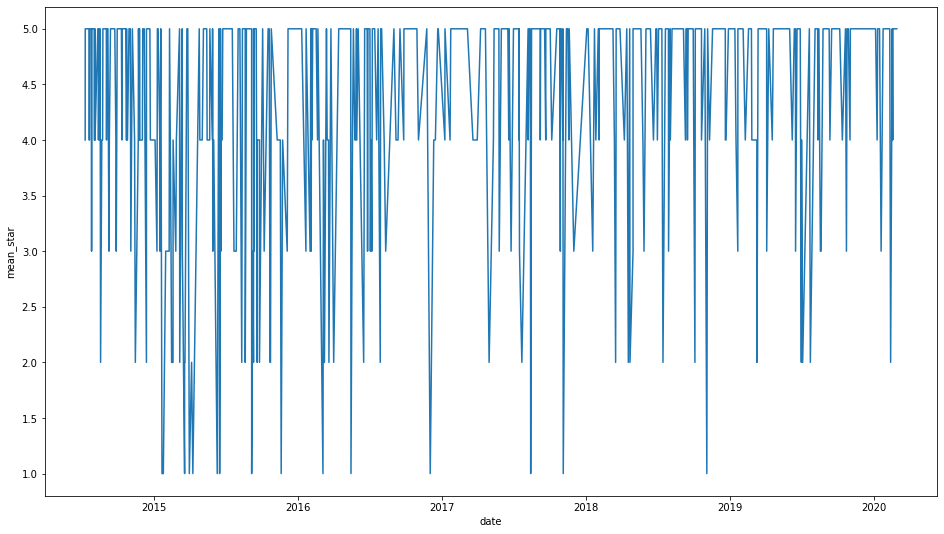

In [23]:
example['date'] = pd.to_datetime(example['date'])
sns.lineplot(x='date', y='mean_star',data = example, legend=False)

In [37]:
preprocessed_review_clean.head()

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
_sS2LBIGNT5NQb6PD1Vtjw,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
0AzLzHfOJgL7ROwhdww2ew,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
8zehGz9jnxPqXtOc7KaJxA,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
xGXzsc-hzam-VArK6eTvtw,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
DbXHNl890xSXNiyRczLWAg,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,5.0,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13


In [6]:
#preprocessed_review_clean = preprocessed_review_clean.set_index(['business_id'])
preprocessed_review_delta = preprocessed_review_clean.assign(delta = preprocessed_review_clean[['date']]
                                                       .groupby('business_id')
                                                       .apply(lambda x: x - x.max()))
preprocessed_review_delta['delta'] = preprocessed_review_delta['delta'].dt.days

In [7]:
def timedelta_period_convert(time_series, timespan = 1, unit = 'month'):
    """
    time_series: the delta column of the dataframe - note: needs to be converted to int already
    timespan: an integer, if we want to segment by 3 month, then timespan would be 3
    unit: 'month', 'week', 'days', 'year'
    
    RETURN:
    new_period: a Pandas Series
    """
    unit_dict = {'month':30, 'week': 7, 'days': 1, 'year': 365}
    days = timespan * unit_dict[unit]
    
    new_period = np.floor(time_series/days)
    
    return new_period

In [8]:
def summarize_column_by_period(dataframe, col, timespan=1, unit='month', count=True):
    """
    this function will call the timedelta_period_convert function
    dataframe: pandas dataframe containing reviews information, 
               should have business_id as its index, and delta in int already
    
    col: str - column name to get summarized info from, e.g. 'stars', 'useful'
             will generated columns for mean, max, min, and sd
    
    timespan: see doc for timedelta_period_convert function
    unit: see doc for timedelta_period_convert function
    count: summarize the number of reviews received during this time frame; default is True
    
    
    RETURN:
    summarized_df: Pandas dataframe with business_id and period as index, and summarized information
    """
    
    df_period = dataframe.assign(period = timedelta_period_convert(
        dataframe['delta'], timespan=timespan, unit=unit))
    
    if count:
        df_period_summarized = df_period.groupby(['business_id', 'period']).agg(
            mean = pd.NamedAgg(column=col, aggfunc=np.mean),
            sd = pd.NamedAgg(column=col, aggfunc=np.std),
            minimum = pd.NamedAgg(column=col, aggfunc=min),
            maximum = pd.NamedAgg(column=col, aggfunc=max),
            review_count = pd.NamedAgg(column='review_id', aggfunc=len)
            )
    else:
        df_period_summarized = df_period.groupby(['business_id', 'period']).agg(
            mean = pd.NamedAgg(column=col, aggfunc=np.mean),
            sd = pd.NamedAgg(column=col, aggfunc=np.std),
            minimum = pd.NamedAgg(column=col, aggfunc=min),
            maximum = pd.NamedAgg(column=col, aggfunc=max)
            )
    
    return df_period_summarized
    

In [9]:
def calculate_regression(dataframe):
    """
    calculates r^2 value of each business over its respective time period
    dataframe: resulting dataframe from summarize_column_by_period
        should have business_id and review_count
    
    RETURN:
    regression_values: Pandas dataframe of business_id and r^2 value
    """
    regression_values = []
    for business_id, new_df in dataframe.groupby(level=0):
        review_column = new_df.loc[:,'review_count']
        num_reviews = review_column.values
        x = num_reviews
        #print(num_reviews)
        y = np.arange(len(num_reviews))
        slope, intercept, r, p, se = ss.linregress(x, y)
        d = {'business_id': business_id,
             'slope': slope,
            'rvalue': r}
        regression_values.append(d)
    regression_values = pd.DataFrame(regression_values)
    return regression_values

In [37]:
summarized = summarize_column_by_period(preprocessed_review_delta, 'stars', timespan=6, unit='month')

#trend = calculate_regression(summarized)

In [38]:
summarized.reset_index(inplace=True)

In [41]:
summarized.at[600, 'business_id']

'-8IpjW6TJbH0VfbPDppUhg'

In [42]:
example = summarized[summarized['business_id'] == '-8IpjW6TJbH0VfbPDppUhg']

In [46]:
example_5yr = example[example['period'].isin(np.arange(-20, -2))]

In [66]:
summarized.head()

mean        sd  minimum  maximum  \
business_id            period                                         
--164t1nclzzmca7eDiJMw -11.0   4.153846  1.143544      1.0      5.0   
                       -10.0   4.857143  0.377964      4.0      5.0   
                       -9.0    4.388889  1.076443      1.0      5.0   
                       -8.0    3.935484  1.030711      1.0      5.0   
                       -7.0    3.444444  1.423427      1.0      5.0   

                               review_count  
business_id            period                
--164t1nclzzmca7eDiJMw -11.0             13  
                       -10.0              7  
                       -9.0              36  
                       -8.0              31  
                       -7.0              18

In [17]:
import seaborn as sns

AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

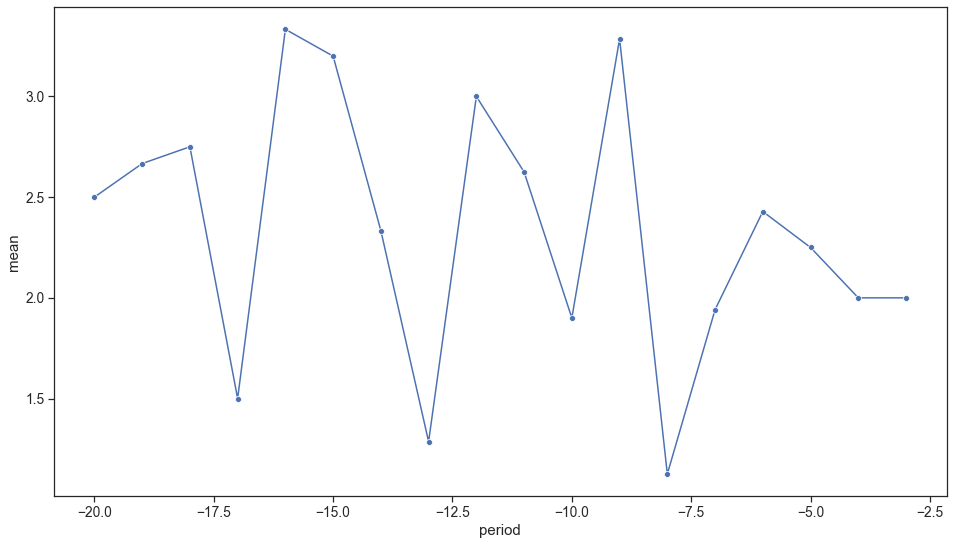

In [57]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.lineplot(x='period', y='mean', data = example_5yr,style='business_id', markers=True, legend=False)
sns.set_axis_labels(" ", "Average star ratings")

In [14]:
trend.head()

,business_id,slope,rvalue
0,--164t1nclzzmca7eDiJMw,-0.173635,-0.591968
1,--UNNdnHRhsyFUbDgumdtQ,0.175897,0.487788
2,--hkbIWgBKBOZq4VcNwdhQ,-0.067637,-0.284633
3,-0A60UZl9nbdq2WWySJ_tQ,0.222491,0.376670
4,-0iqnv7MjKrgh7Q7bYRlUQ,-0.295761,-0.640014


In [40]:
# subset reviews based on slope and r value
# select those with r value < -0.5 and plot
decline_business_id = trend[trend['rvalue']<= -0.5]

In [41]:
decline_business_id.slope.mean()

-0.28733436019119135

In [42]:
decline_business = summarized[summarized.index.get_level_values(0).isin(decline_business_id['business_id'])]

In [88]:
decline_business = decline_business.reset_index()

In [89]:
decline_5yr = decline_business[decline_business['period'].isin(np.arange(-10, 0))]

In [96]:
decline_5yr.head()

,business_id,period,mean,sd,minimum,maximum,review_count
1,--164t1nclzzmca7eDiJMw,-10.0,4.857143,0.377964,4.0,5.0,7
2,--164t1nclzzmca7eDiJMw,-9.0,4.388889,1.076443,1.0,5.0,36
3,--164t1nclzzmca7eDiJMw,-8.0,3.935484,1.030711,1.0,5.0,31
4,--164t1nclzzmca7eDiJMw,-7.0,3.444444,1.423427,1.0,5.0,18
5,--164t1nclzzmca7eDiJMw,-6.0,3.785714,1.423893,1.0,5.0,14


<AxesSubplot:xlabel='period', ylabel='review_count'>

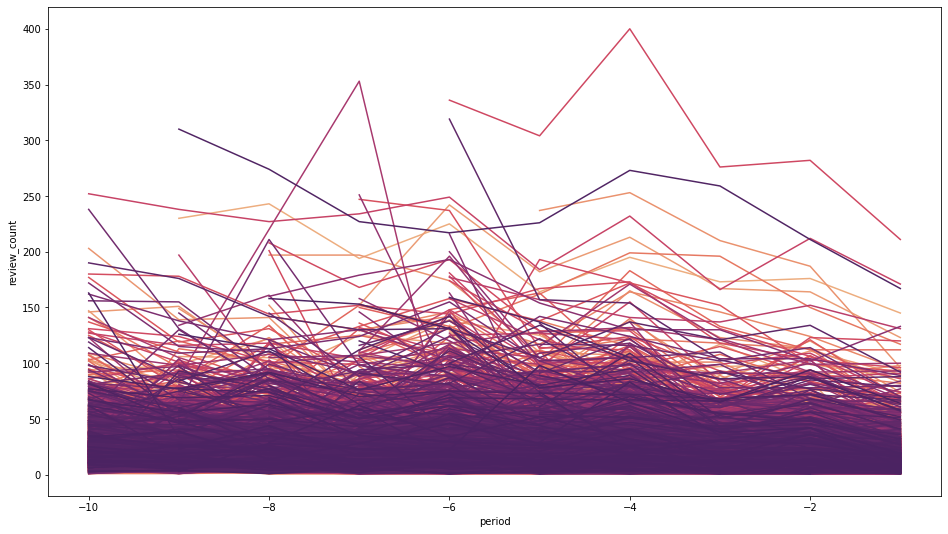

In [92]:
sns.lineplot(x='period', y='review_count', hue = 'business_id', 
             palette="flare",
             data = decline_5yr, legend=False)

<AxesSubplot:xlabel='period', ylabel='mean'>

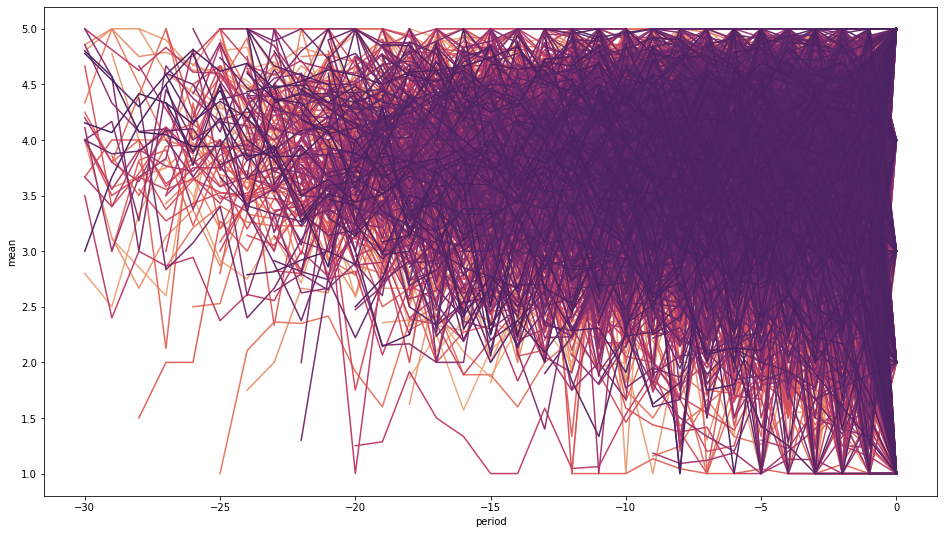

In [55]:
sns.lineplot(x='period', y='mean', hue = 'business_id', 
             palette="flare",
             data = decline_business, legend=False)

In [35]:
decline_business.index.get_level_values(0).unique()

Index(['--164t1nclzzmca7eDiJMw', '-0iqnv7MjKrgh7Q7bYRlUQ',
       '-3OkvsjV-Gu9AMRuxjC2Mw', '-3VQI-QXI7fr4TWH0d8p5A',
       '-3jJSQtMfsGacIUHaFcZbQ', '-4bP1UUgpZumIu6DZMaMzw',
       '-5VyAi8GR34xmDAgFZTitg', '-73eq54JXPZHHijkvTkJ6Q',
       '-7spaV_9jMV2pRva6eJ0JQ', '-8LdHGN1xVpmvfy0efwzqg',
       ...
       'zfEuNOQCRUmBoduSmSRneg', 'zgLCiq239ztOrbFoeLoJfw',
       'zoWT2_VY0hpbvNqe57-uHg', 'zqTD7GlF7NVhbHaFWkDSgg',
       'zs9D9UoOgKR5xBFygtWKZA', 'zuX62H-F22A7ZkugHcKtbw',
       'zubXuwlAEbvZd-MiLOgofQ', 'zuwtC30ADJNdYdU14_RvZw',
       'zwn53gHyn1NlX9h3jKFOUg', 'zyauuvAYdVweBK4L7wBRmw'],
      dtype='object', name='business_id', length=3262)

In [38]:
decline = business_df[business_df['business_id'].isin(decline_business_id['business_id'])]

In [40]:
decline.is_open.value_counts()

1    2395
0     867
Name: is_open, dtype: int64

In [56]:
booming_business_id = trend[trend['rvalue']>= 0.5]

In [57]:
booming_business_id.slope.mean()

0.6539824845268275

In [59]:
booming_business = summarized[summarized.index.get_level_values(0).isin(booming_business_id['business_id'])]

<AxesSubplot:xlabel='period', ylabel='review_count'>

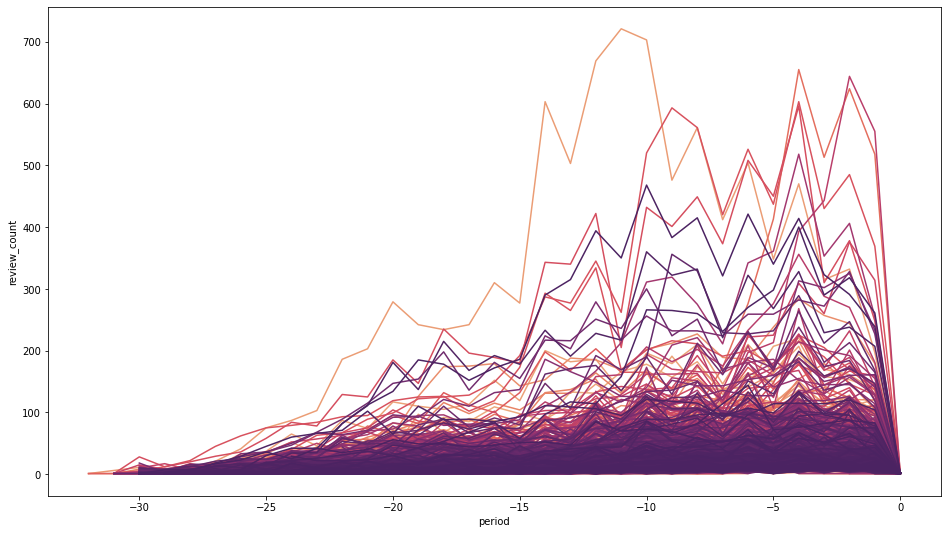

In [60]:
sns.lineplot(x='period', y='review_count', hue = 'business_id', 
             palette="flare",
             data = booming_business, legend=False)

<AxesSubplot:xlabel='period', ylabel='mean'>

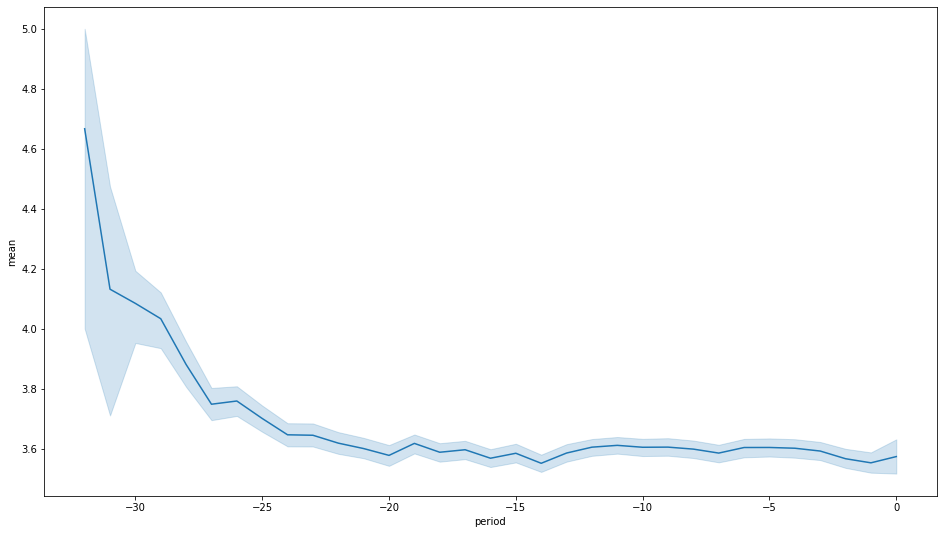

In [62]:
sns.lineplot(x='period', y='mean',
             data = booming_business, legend=False)

In [43]:
booming_business.index.get_level_values(0).unique()

Index(['-3hnEon-pSQRGPDr80s3Gw', '-4ofMtrD7pSpZIX5pnDkig',
       '-4v7EsRnSK00sAgu6wxfgw', '-5-s0IGhN633QhhS_TSR9A',
       '-8IpjW6TJbH0VfbPDppUhg', '-938jbP4QBtSLuXgZsLeNQ',
       '-CHazLwo2j2G8gWEZN53hA', '-CPd_oNhKSF9R4cjNg0yzQ',
       '-DeoafeWHFwpMlfCYCtLXw', '-DpCvTfP1xsxHcwhFevM6w',
       ...
       'zpD_ZKfemv1-vE0UnKM2Fw', 'zqDaDcrPJbecQhT4z6okIg',
       'zsZx06ssEyPrOicFvmp7VA', 'ztInMEDF-Jhub8ifXuUI5Q',
       'ztY4uPNUTWMN9LT3L5mD3Q', 'zuXEcrVzZhay_qxqsnCUkQ',
       'zuo--ubf8q-VEHhDYiQ3fg', 'zwhSGiftT_yzKSEmMCol6Q',
       'zxQ7WxWAhp6l_M3iIm2x8w', 'zyHMtStYlKG67WRprp6GZQ'],
      dtype='object', name='business_id', length=2895)

In [44]:
booming = business_df[business_df['business_id'].isin(booming_business_id['business_id'])]

In [45]:
booming.is_open.value_counts()

1    2594
0     301
Name: is_open, dtype: int64

In [ ]:
# chisquare test

In [50]:
crosstab = np.zeros((2,2))
crosstab[0, 0] = 2395
crosstab[0, 1] = 2594
crosstab[1, 0] = 867
crosstab[1, 1] = 301
crosstab

array([[2395., 2594.],
       [ 867.,  301.]])

In [51]:
chi2, p, dof, ex = ss.chi2_contingency(crosstab, correction=False)

In [52]:
chi2

261.26758972446817

In [53]:
p

9.082687820084762e-59

In [116]:
# test out the groupby and then pipe function call idea on a smaller dataset

In [69]:
test_set = {'zzin1d1oHi81GuI0ufo1VA', '--164t1nclzzmca7eDiJMw'}
test_reviews = subset_review[subset_review["business_id"].isin(test_set)]
test_reviews = test_reviews.sort_values(by=['business_id','date']).set_index('business_id')

In [70]:
test_reviews['date'] = pd.to_datetime(test_reviews['date'])

In [77]:
# this is a reliable way to get the difference!!!!
test_review_delta = test_reviews.assign(delta = test_reviews[['date']].groupby('business_id').apply(
lambda x: x - x.max()))


In [92]:
test_review_delta['delta'] = test_review_delta['delta'].dt.days

In [136]:
summarize_column_by_period(test_review_delta, 'stars', timespan=5, unit='month')
#test_review_delta.groupby(['business_id','delta']).agg(len)

mean        sd  minimum  maximum  \
business_id            period                                         
--164t1nclzzmca7eDiJMw -13.0   4.153846  1.143544      1.0      5.0   
                       -12.0   4.750000  0.500000      4.0      5.0   
                       -11.0   4.583333  0.974308      1.0      5.0   
                       -10.0   3.777778  1.072010      1.0      5.0   
                       -9.0    4.333333  1.234427      1.0      5.0   
                       -8.0    3.722222  1.363626      1.0      5.0   
                       -7.0    3.555556  1.509231      1.0      5.0   
                       -6.0    4.000000  1.195229      2.0      5.0   
                       -5.0    3.181818  1.250454      1.0      5.0   
                       -4.0    2.500000  0.707107      2.0      3.0   
                       -3.0    2.600000  1.140175      1.0      4.0   
                       -2.0    1.000000       NaN      1.0      1.0   
                        0.0    1.000000       NaN      1.0      1.0   
zzin1d1oHi81GuI0ufo1VA -33.0   5.000000       NaN      5.0      5.0   
                       -32.0   5.000000       NaN      5.0      5.0   
                       -31.0   4.666667  0.577350      4.0      5.0   
                       -30.0   4.200000  0.836660      3.0      5.0   
                       -29.0   3.555556  1.013794      2.0      5.0   
                       -28.0   4.000000  1.044466      2.0      5.0   
                       -27.0   4.153846  0.688737      3.0      5.0   
                       -26.0   4.000000  0.654654      3.0      5.0   
                       -25.0   4.000000  0.816497      2.0      5.0   
                       -24.0   3.166667  0.834847      2.0      4.0   
                       -23.0   3.000000  1.290994      1.0      5.0   
                       -22.0   3.466667  1.060099      1.0      5.0   
                       -21.0   3.857143  1.099450      2.0      5.0   
                       -20.0   3.705882  1.571810      1.0      5.0   
                       -19.0   3.166667  1.098127      1.0      5.0   
                       -18.0   3.500000  1.192079      1.0      5.0   
                       -17.0   3.700000  1.260743      1.0      5.0   
                       -16.0   3.962963  1.224163      1.0      5.0   
                       -15.0   3.818182  1.332251      1.0      5.0   
                       -14.0   3.862069  1.186957      1.0      5.0   
                       -13.0   4.000000  1.171558      1.0      5.0   
                       -12.0   3.750000  1.296476      1.0      5.0   
                       -11.0   3.742857  1.244821      1.0      5.0   
                       -10.0   3.592593  1.448056      1.0      5.0   
                       -9.0    3.517241  1.454566      1.0      5.0   
                       -8.0    3.809524  1.364516      1.0      5.0   
                       -7.0    4.050000  1.190975      1.0      5.0   
                       -6.0    3.550000  1.571958      1.0      5.0   
                       -5.0    3.739130  1.452815      1.0      5.0   
                       -4.0    3.360000  1.577973      1.0      5.0   
                       -3.0    3.777778  1.394433      1.0      5.0   
                       -2.0    3.941176  1.477777      1.0      5.0   
                       -1.0    3.714286  1.637473      1.0      5.0   
                        0.0    4.000000       NaN      4.0      4.0   

                               review_count  
business_id            period                
--164t1nclzzmca7eDiJMw -13.0             13  
                       -12.0              4  
                       -11.0             24  
                       -10.0             36  
                       -9.0              15  
                       -8.0              18  
                       -7.0               9  
                       -6.0               8  
                       -5.0              11  
                       -4.0               2  
   

In [108]:
test_review_delta.assign(period = timedelta_period_convert(test_review_delta['delta'], unit='week'))

,review_id,user_id,stars,useful,funny,cool,text,date,delta,period
business_id,,,,,,,,,,
--164t1nclzzmca7eDiJMw,HcZ2W-oRHgnP6Zs0xYfoUw,InDrrRvQ9f732YGPX4Ixmg,4.0,9,11,10,I don't want to give away too much since it wa...,2009-03-17 01:53:31,-1911,-273.0
--164t1nclzzmca7eDiJMw,6kurfVrLY9LuZnH-5GGCgQ,iktHs9VX9xK4dJW9szxRBA,4.0,1,0,1,"Yum, yum. Good food, big portions and nice pri...",2009-03-24 00:15:04,-1904,-272.0
--164t1nclzzmca7eDiJMw,eKTlMEpr163ZegnJmHYrqA,InDrrRvQ9f732YGPX4Ixmg,3.0,5,5,4,"Well, after one day at the South Congress loca...",2009-03-24 16:46:52,-1904,-272.0
--164t1nclzzmca7eDiJMw,fvuwn2Aa3SNGeCTlC3O8Ew,nHnNraNUct25HJJTRAGYkA,1.0,2,2,2,Me So Hungry earns 1 star because the owner's ...,2009-03-24 19:13:33,-1904,-272.0
--164t1nclzzmca7eDiJMw,qUCBZ2I5Cuf3J4Yzn5k21g,18_WSz4VPqieDzBsSvCMmA,5.0,1,0,0,I work across the street from Me So Hungry and...,2009-05-15 21:17:39,-1852,-265.0
...,...,...,...,...,...,...,...,...,...,...
zzin1d1oHi81GuI0ufo1VA,JB82fGnjremR2CqVUxHIeg,tihD0p2f14LFyTG4Prjt-A,1.0,1,0,0,I've eaten here during the buffet and via Uber...,2020-01-23 11:59:58,-23,-4.0
zzin1d1oHi81GuI0ufo1VA,Oal9yDqSP7ehOrW0cvi4UQ,kmfO1ZlFhXtFAqbgZvroaw,1.0,1,0,1,I ordered matar paneer through Ubereats and I ...,2020-02-04 23:47:15,-10,-2.0
zzin1d1oHi81GuI0ufo1VA,nk9BXOVubEbENCRg4c9xbQ,9tJBrP3aM-nFF2O9AeMsfg,5.0,2,0,0,This is a gem in the Briarcliff area for anyon...,2020-02-05 01:50:12,-10,-2.0


In [89]:
#test = test_review_delta.reset_index().set_index(['business_id','delta'])

business_id
--164t1nclzzmca7eDiJMw    [AxesSubplot(0.125,0.749828;0.775x0.130172), A...
zzin1d1oHi81GuI0ufo1VA    [AxesSubplot(0.125,0.749828;0.775x0.130172), A...
dtype: object

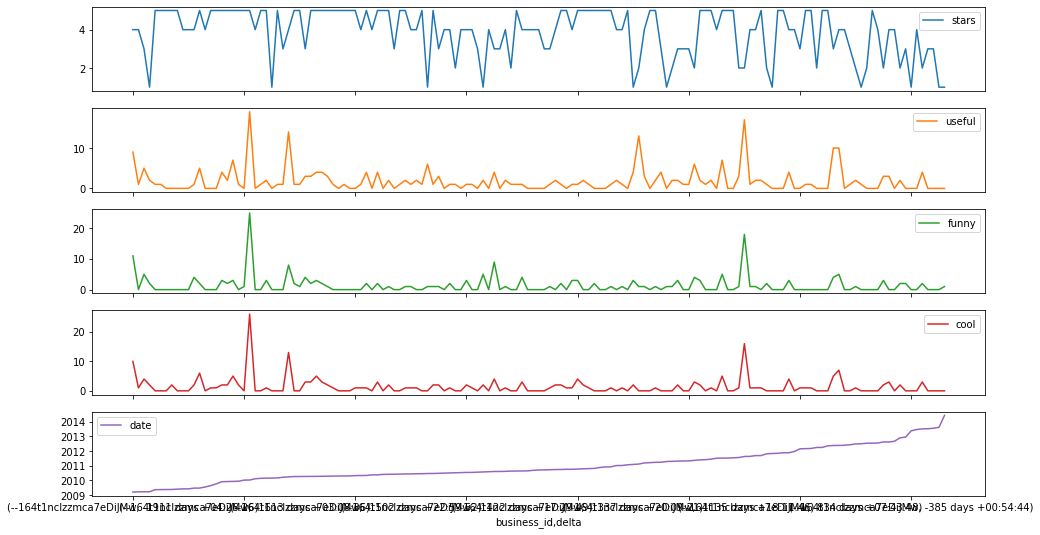

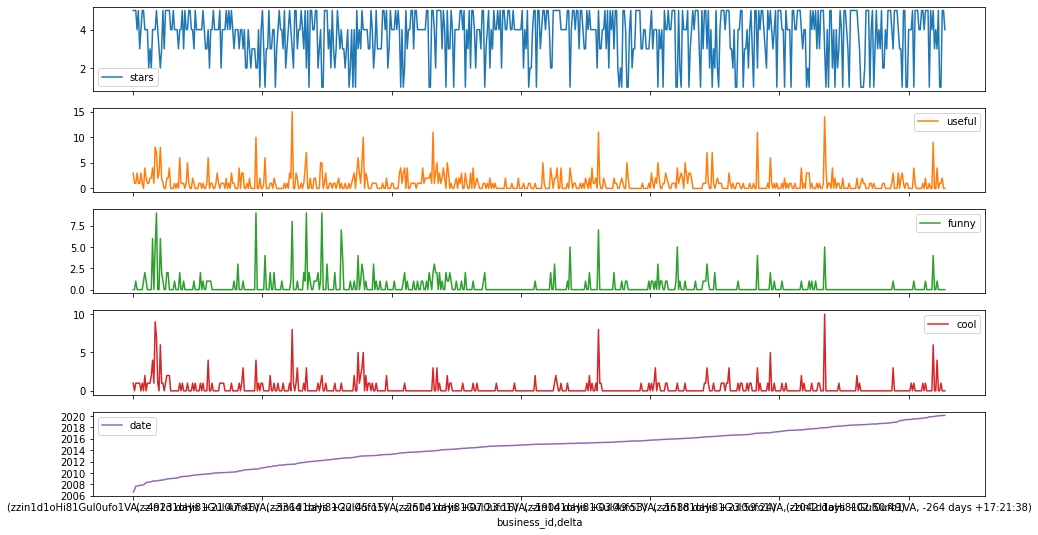

In [83]:
#fig, ax = plt.subplots(1, 2, figsize=(15, 9))
test.groupby('business_id').plot(subplots=True)


In [91]:
test = test_review_delta.reset_index()

In [47]:
test.index[1]

('--164t1nclzzmca7eDiJMw', Timedelta('-1904 days +02:47:59'))